In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [4]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x)+b
    if tmp <= 0:
        return 0
    else:
        return 1

In [5]:
print(OR(0,1))
print(OR(1,0))
print(OR(0,0))

1
1
0


In [6]:
def XOR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.1
    tmp = np.sum(w*x)+b
    if tmp <= 0:
        return 0
    else:
        return 1

In [7]:
print(XOR(0,1))
print(XOR(1,0))
print(XOR(0,0))

1
1
0


In [8]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
faces

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [9]:
import matplotlib.pyplot as plt

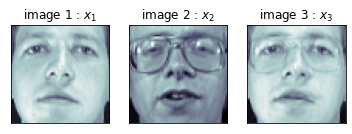

In [10]:
f, ax = plt.subplots(1, 3)
ax[0].imshow(faces.images[6], cmap = plt.cm.bone)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('image 1 : $x_1$')

ax[1].imshow(faces.images[10], cmap = plt.cm.bone)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('image 2 : $x_2$')

new_face = 0.7 * faces.images[6] + 0.3 * faces.images[10]
ax[2].imshow(new_face, cmap = plt.cm.bone)
ax[2].grid(False)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title('image 3 : $x_3$')

plt.show()

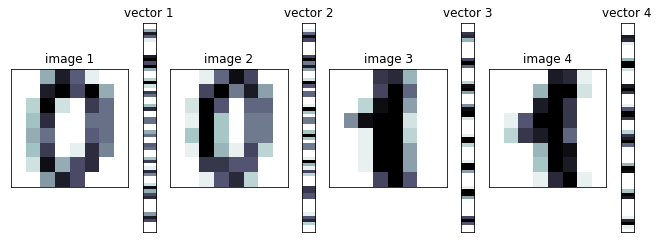

In [11]:
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec

digits = load_digits()
d1 = digits.images[0]
d2 = digits.images[10]
d3 = digits.images[1]
d4 = digits.images[11]
v1 = d1.reshape(64, 1)
v2 = d2.reshape(64, 1)
v3 = d3.reshape(64, 1)
v4 = d4.reshape(64, 1)

plt.figure(figsize = (9, 9))
gs = gridspec.GridSpec(1, 8, height_ratios = [1],
                      width_ratios =  [9, 1, 9, 1, 9, 1, 9, 1])
for i in range(4):
    plt.subplot(gs[2 * i])
    plt.imshow(eval('d' + str(i + 1)), aspect = 1,
              interpolation = 'nearest', cmap = plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title('image {}'.format(i + 1))
    plt.subplot(gs[2 * i + 1])
    plt.imshow(eval('v' + str(i + 1)), aspect = 0.25, 
              interpolation = 'nearest', cmap = plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title('vector {}'.format(i + 1))
plt.tight_layout()
plt.show()


# 밑바닥부터 시작하는 퍼셉트론

## 퍼셉트론(perceptron)개념

In [12]:
from IPython.display import Image

![](image/perceptron.jpg)

- x1, x2 는 입력신호, w1, w2 는 가중치를 뜻함
- x1, x2 의 원을 뉴런 또는 노드 라고 부른다.
- 뉴런에서 보내온 신호의 총합이 정해진 한계(임계값: 세타(theta:$\theta$))를 넘어설 때만 1을 출력
- return 0 => (w1 * x1 + w2 * x2) <= theta
- return 1 => (w1 * x1 + w2 * x2) > theta

## 퍼셉트론 논리회로 이해하기 

In [13]:
# 두 값이 모두 같아야 함(1,1 -> 1)
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2 
    if tmp <= theta:
        return 0
    else:
        return 1

In [14]:
print(AND(0, 0))
print(AND(0, 1))
print(AND(1, 0))
print(AND(1, 1))

0
0
0
1


In [15]:
# 두 값이 모두 같아야 함(1,1 -> 0)
# AND 함수의 반대
def NAND(x1, x2):
    w1, w2, theta = -0.5, -0.5, -0.7
    tmp = x1*w1 + x2*w2 
    if tmp <= theta:
        return 0
    else:
        return 1

In [16]:
print(NAND(0, 0))
print(NAND(0, 1))
print(NAND(1, 0))
print(NAND(1, 1))

1
1
1
0


In [17]:
# 두 값중 하나만 같아도 됨(0,1 ->1 or 1,0 ->1)
# w1, w2가 양수이고, 각각 0.5, 0.4일 경우 theta값이 0 ~ 0.3 설정하면 OR함수를 만들 수 있다.
def OR(x1, x2):
    w1, w2, theta = 0.5, 0.4, 0.1
    tmp = x1*w1 + x2*w2 
    if tmp <= theta:
        return 0
    else:
        return 1

In [18]:
print(OR(0, 0))
print(OR(0, 1))
print(OR(1, 0))
print(OR(1, 1))

0
1
1
1


## 가중치와 편향

![](image/deeplearning.png)

In [19]:
import numpy as np
x = np.array([0, 1]) # 입력
w = np.array([0.5, 0.5]) # 가중치
b = -0.7 # 편향
w * x 

array([0. , 0.5])

In [20]:
np.sum(w * x)

0.5

In [21]:
np.sum(w * x) + b

-0.19999999999999996

In [22]:
# XOR 게이트 만들기 
def XOR(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    b = -0.7
    tmp = x1*w1 + x2*w2 
    if tmp <= theta:
        return 0
    else:
        return 1

In [23]:
# 어떻게 하면 XOR 처럼 나올까?? p54
# 결론 직선이라는 선형으로는 나올 수 없기 때문에 지금 배운 것으로는 구현할 수 없다!
print(XOR(0, 0))
print(XOR(0, 1))
print(XOR(1, 0))
print(XOR(1, 1))

0
0
0
1


# 다층 퍼셉트론 출동 

## XOR게이트 구현하기

- 퍼셉트론은 직선 하나로 나눈 영역만 표현할 수 있다는 한계가 있었음
- 다층 퍼셉트론으로 XOR게이트를 구현할 예정

>기존 게이트(AND, NAND, OR)를 조합해 구현해낸 XOR 게이트 

![](image/XORgate.jpg)

In [26]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [27]:
print(XOR(0, 0))
print(XOR(0, 1))
print(XOR(1, 0))
print(XOR(1, 1))

0
1
1
0
